In [22]:
#Libraries
import scipy
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score
from scipy import io
from scipy import stats
from scipy.io import loadmat
from numpy import reshape
from matplotlib.pyplot import figure
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set()

In [23]:
#import data set
df =  pd.read_csv('data/diabetes.csv', sep=',')
attribute_names = []
num_rows, num_cols = df.shape

for i in range(num_cols):
    attribute_names.append(df.columns[i])
    
#Print the number of columns and rows 
print("(number of rows, number of columns) = ",df.shape)

#Print the first 5 elements of the dataset
df.head()

(number of rows, number of columns) =  (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
# We used the pandas libary: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
# Again some other function from pandas: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe
# It looks at the dataframe and gives some standard statistics like mean, std, min, max etc
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


We see that some attributes have 0 as minimum value, this means we missing/invalid values in the following columns:

1. Glucose
2. Bloodpressure
3. SkinThickness
4. Insulin
5. BMI


In [26]:
# Replace zero values with NaN in order to remove them from our calculations. 
data_copy= df.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

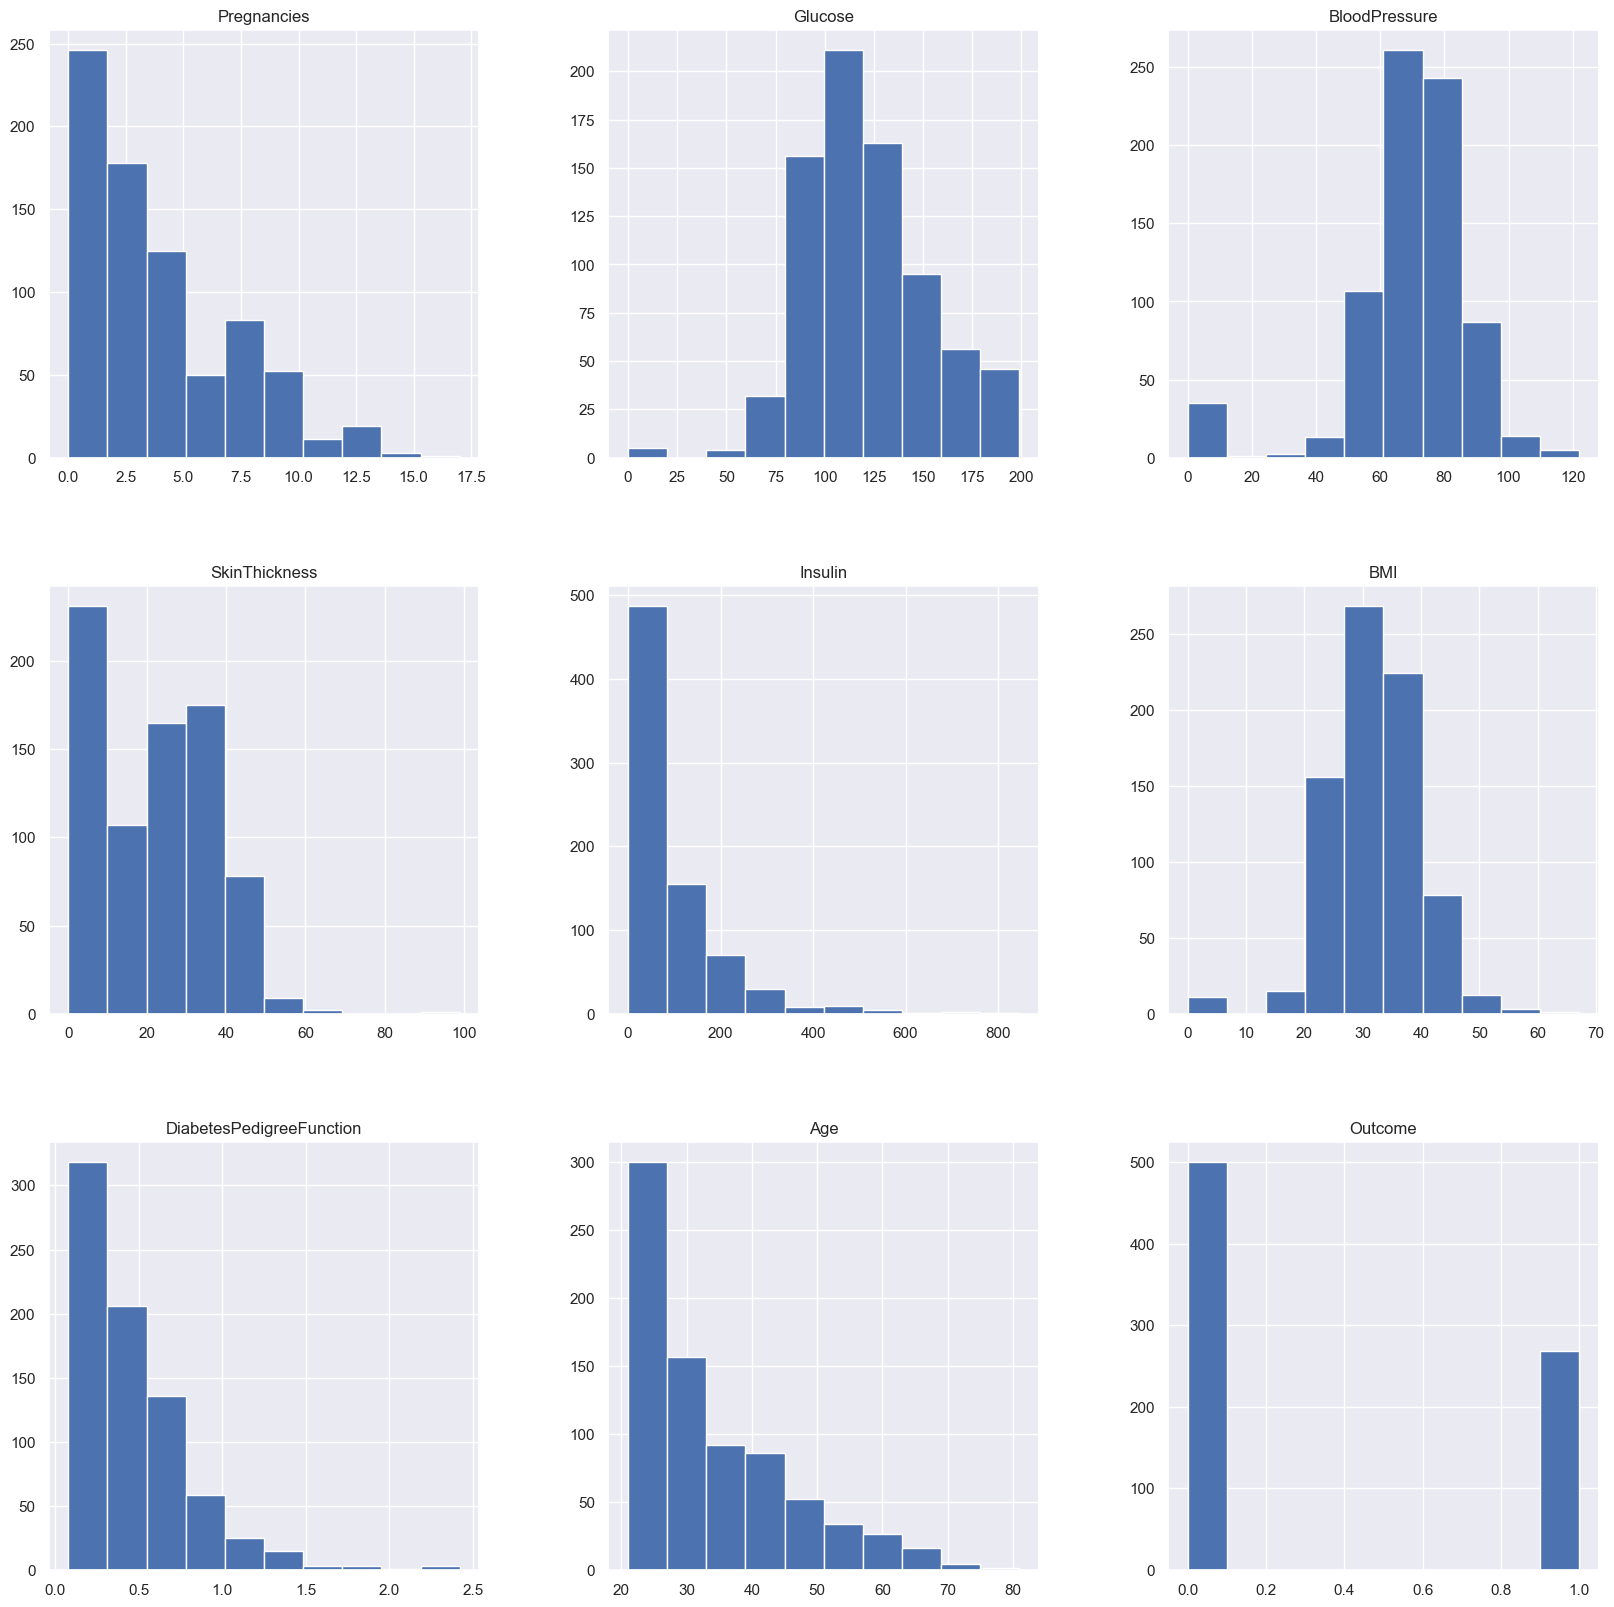

In [27]:
df.hist(figsize = (20,20))

In [28]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)

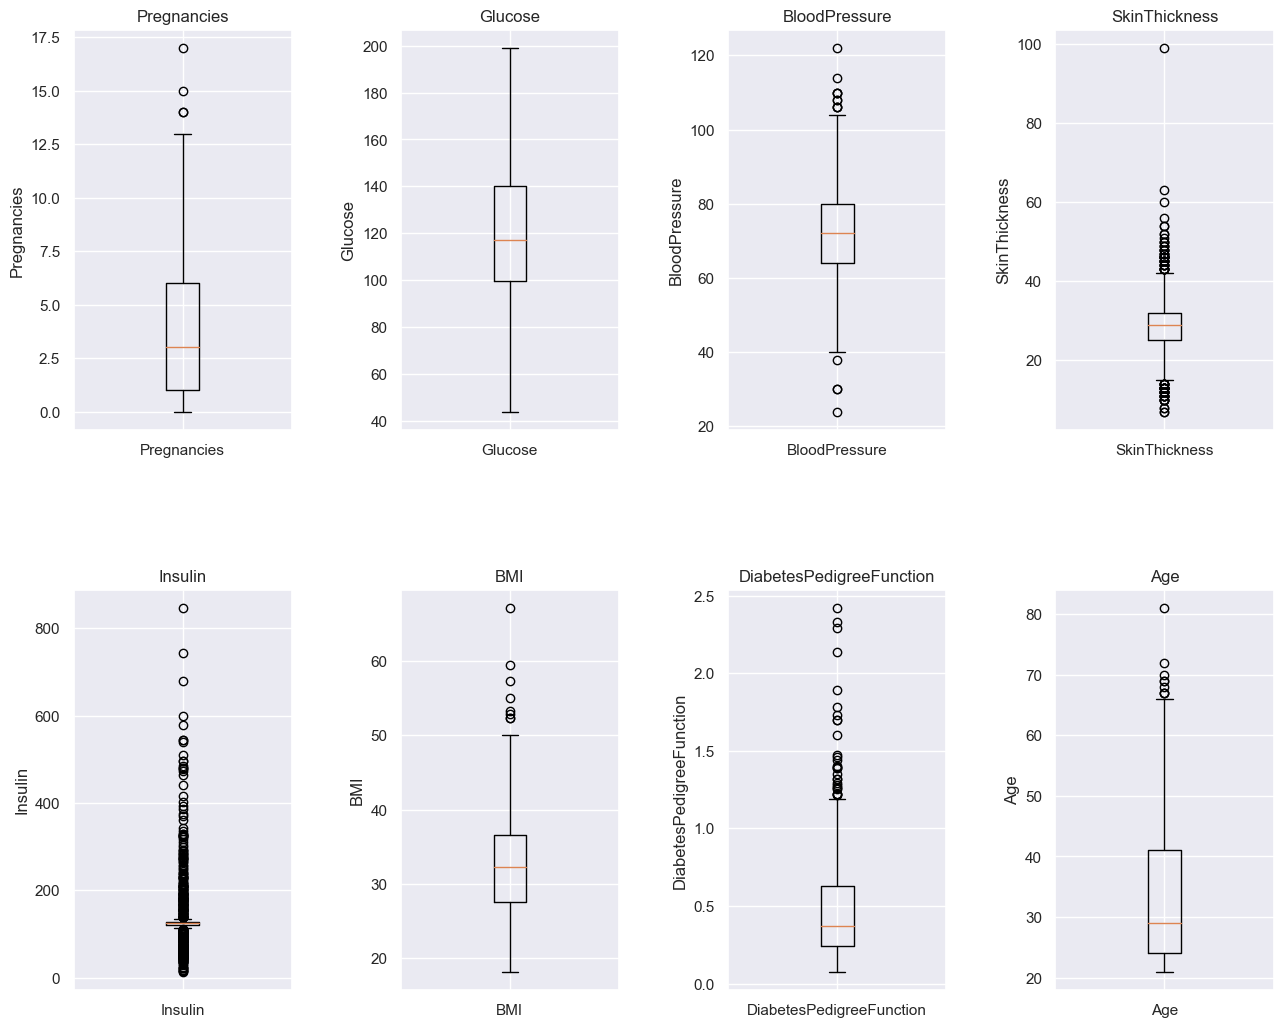

In [29]:
fig, ax=plt.subplots(nrows=2, ncols=4, figsize=(15,12))

for i in range(4):
    x = attribute_names[i]
    ax[0,i].boxplot(data_copy[str(x)], labels=[str(x)])
    ax[0,i].set_ylabel(str(x))
    ax[0,i].set_title(str(x))

for i in range(4,8):
    x = attribute_names[i]
    ax[1,i-4].boxplot(data_copy[str(x)], labels=[str(x)])
    ax[1,i-4].set_ylabel(str(x))
    ax[1,i-4].set_title(str(x))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

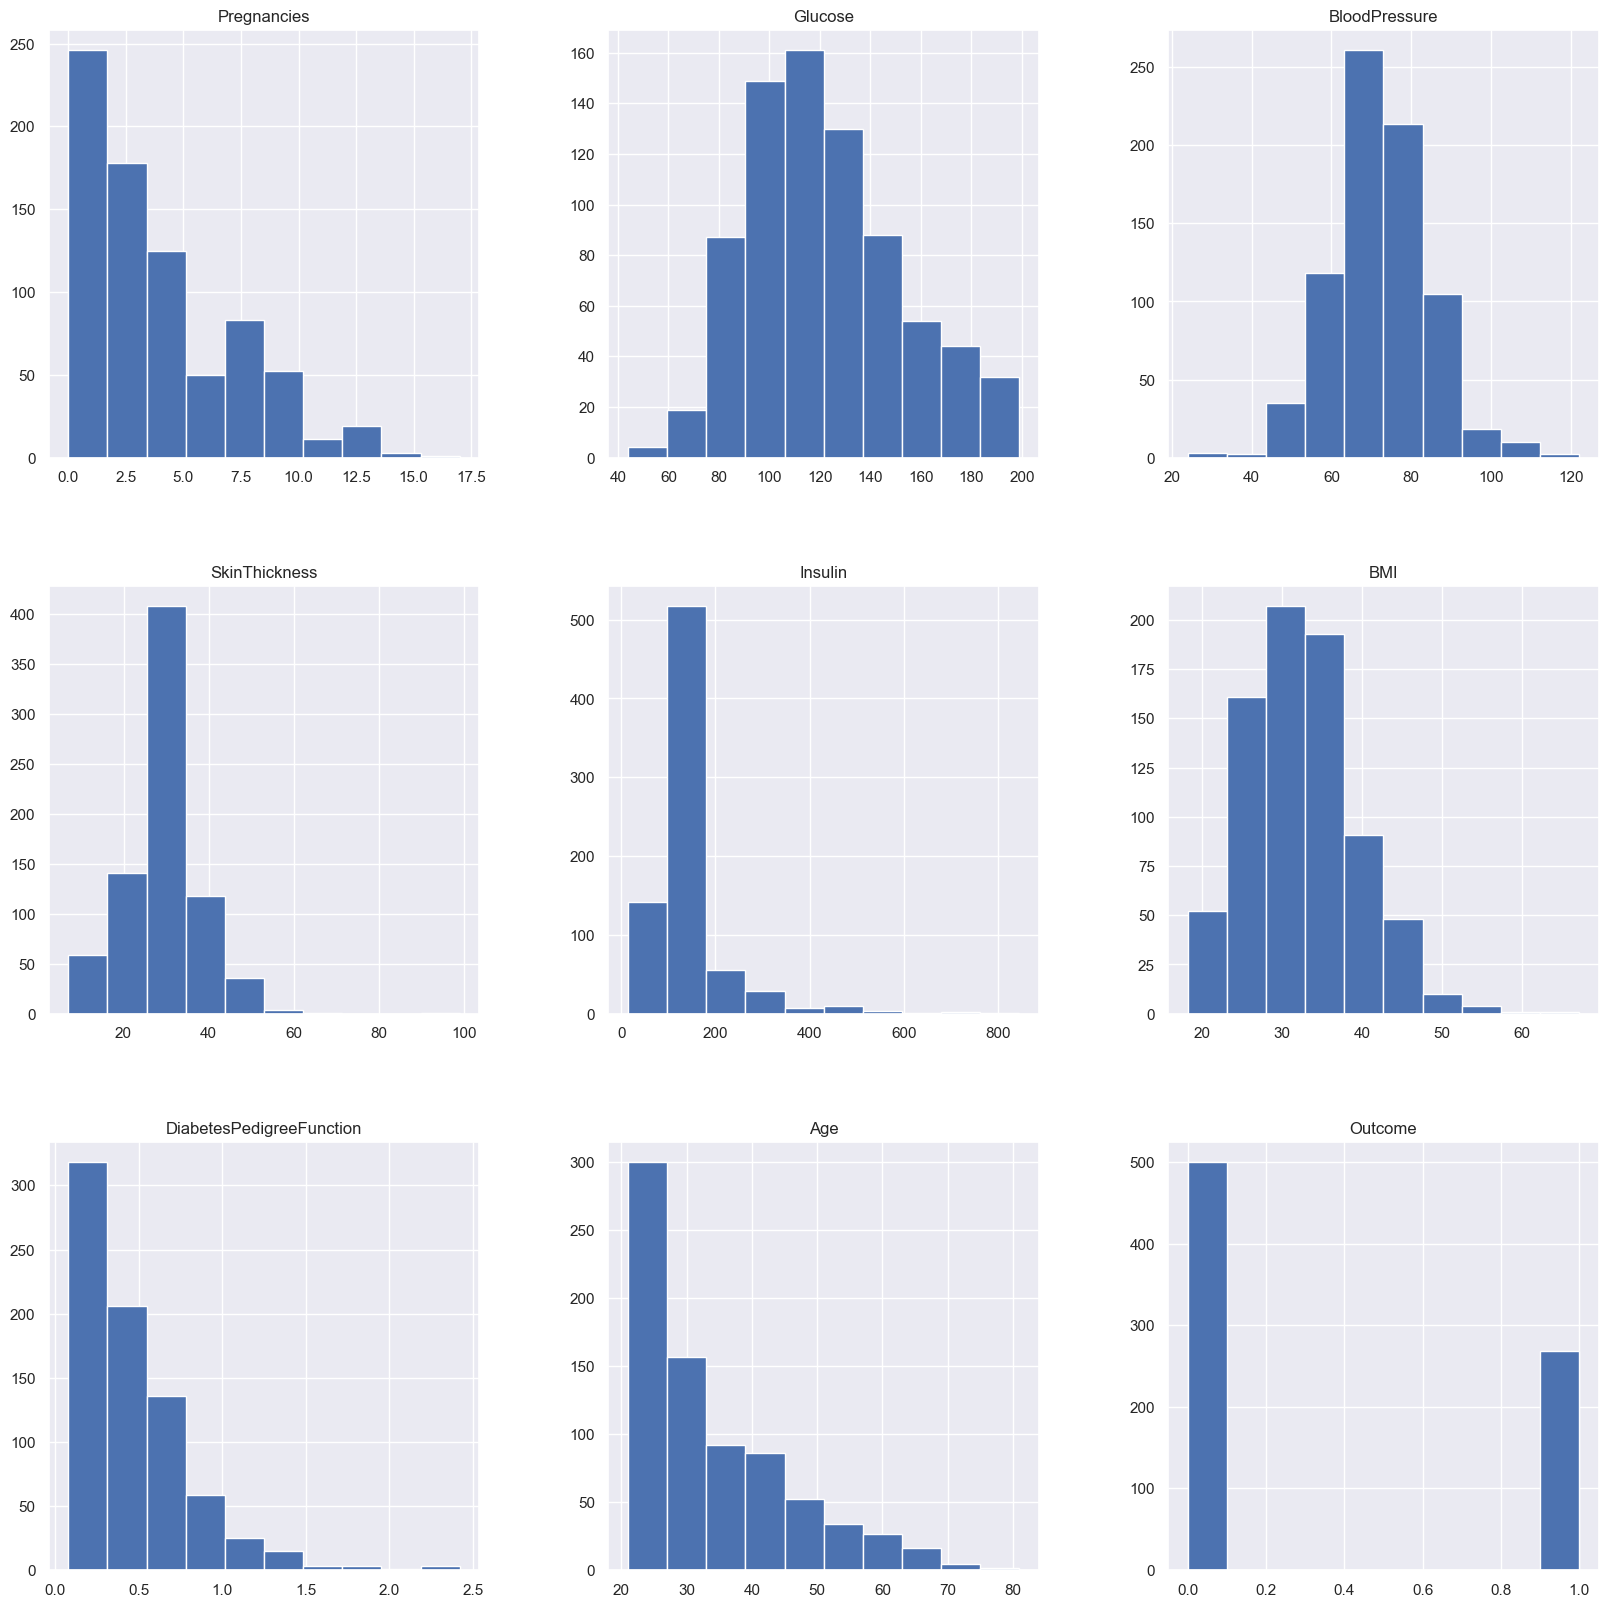

In [30]:
data_copy.hist(figsize = (20,20))

In [31]:
print(df.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


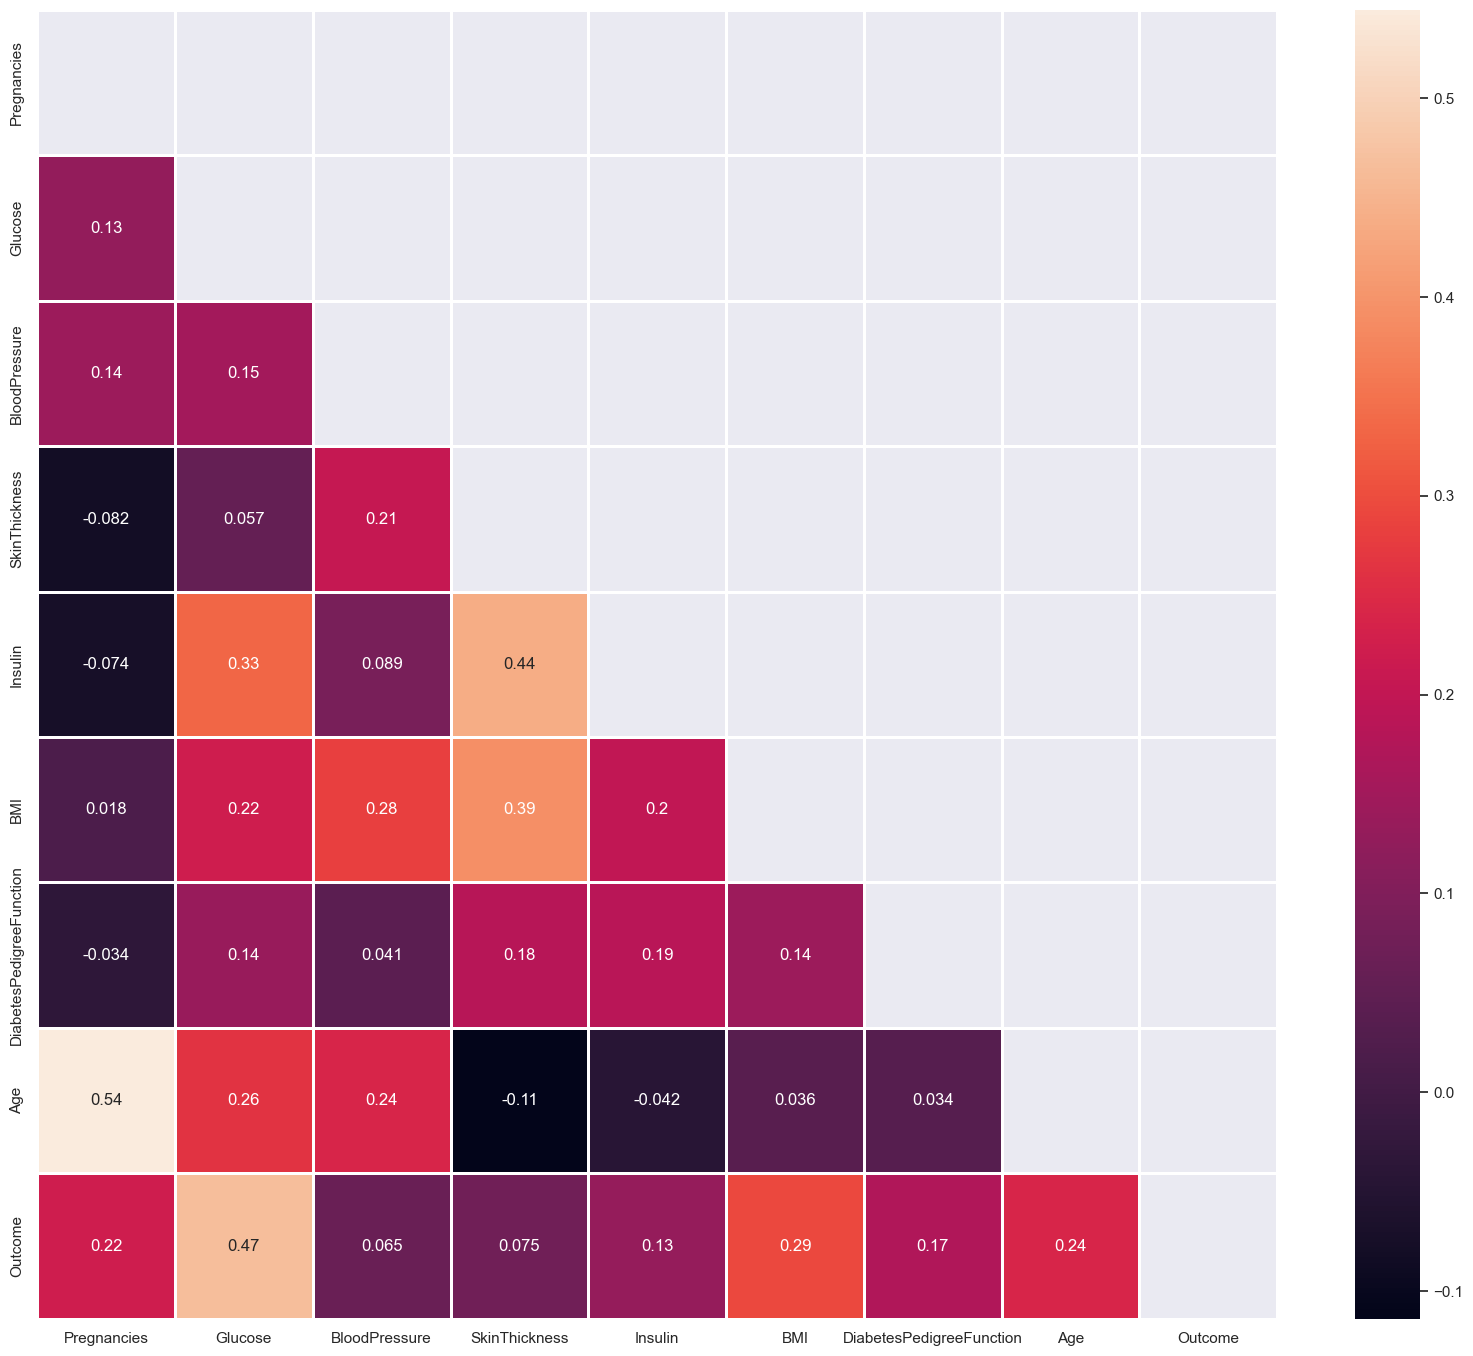

In [32]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

In [33]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [34]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [35]:
y = data_copy.Outcome

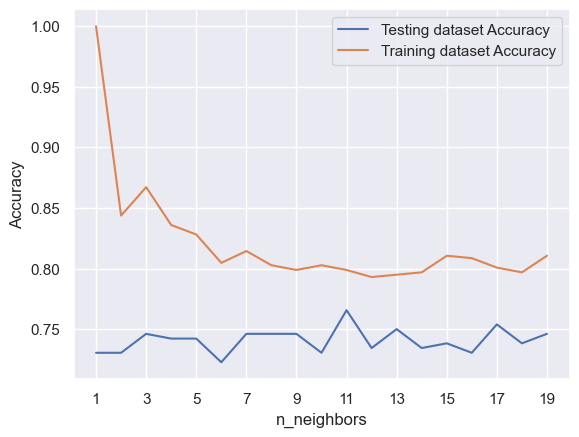

Optimal k is 11


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

#Finding which k is optimal for our dataset
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 2))
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
print("Optimal k is", np.argmax(test_accuracy) + 1)

In [37]:
from sklearn.model_selection import train_test_split

nr_of_iterations = 10
X_train = np.empty(nr_of_iterations, dtype=object)
X_test = np.empty(nr_of_iterations, dtype=object)
y_train = np.empty(nr_of_iterations, dtype=object)
y_test = np.empty(nr_of_iterations, dtype=object)

for i in range(nr_of_iterations):
  X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(X, y, test_size=0.3, random_state=i)

In [38]:
#Training the Gaussian Naive Bayes model
y_pred_class_gnb = np.empty(nr_of_iterations, dtype=object)
y_pred_prob_gnb = np.empty(nr_of_iterations, dtype=object)

for i in range(nr_of_iterations):
  gnb = GaussianNB()
  model_gnb = gnb.fit(X_train[i], y_train[i])
  y_pred_prob_gnb[i] = model_gnb.predict_proba(X_test[i])[:,0]
  y_pred_class_gnb[i] = model_gnb.predict(X_test[i])

In [39]:
#Training KNN model
y_pred_prob_knn = np.empty(nr_of_iterations, dtype=object)
y_pred_class_knn = np.empty(nr_of_iterations, dtype=object)

for i in range(nr_of_iterations):
  model_knn = KNeighborsClassifier(n_neighbors = 11)
  model_knn.fit(X_train[i], y_train[i])
  y_pred_prob_knn[i] = model_knn.predict_proba(X_test[i])[:,0]
  y_pred_class_knn[i] = model_knn.predict(X_test[i])

# ROC Curves & AUC Scores

# Confusion Matrices

Average AUC Gaussian Naive Bayes:		0.8215172063078156
Average AUC K Neighbors:				0.8223450132614349

Average accuracy score Gaussian Naive Bayes:	0.7545454545454546
Average accuracy score K Neighbours:		0.7506493506493507



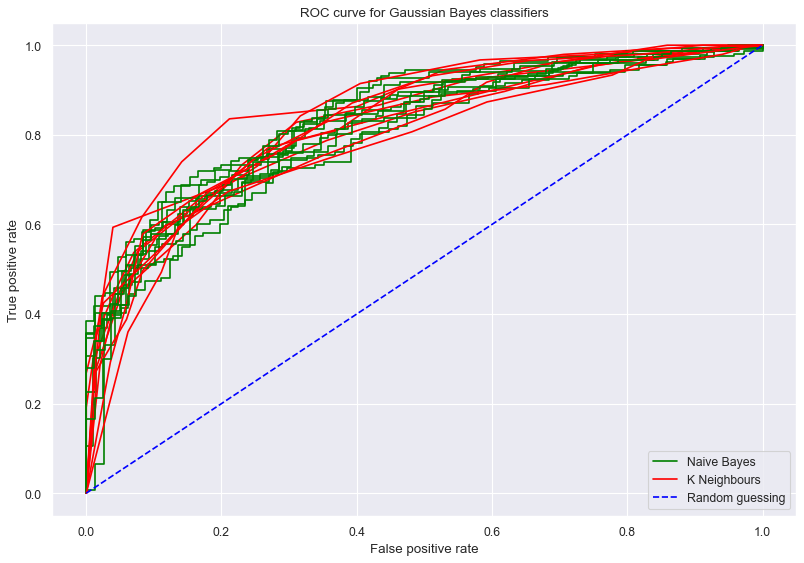

In [40]:
# Calculating average AUC scores
AUC_gnb = sum([metrics.roc_auc_score(y_test[i], y_pred_prob_gnb[i]) for i in range(nr_of_iterations)])/nr_of_iterations
print('Average AUC Gaussian Naive Bayes:\t\t'+str(1- AUC_gnb))

AUC_knn = sum([metrics.roc_auc_score(y_test[i], y_pred_prob_knn[i]) for i in range(nr_of_iterations)])/nr_of_iterations
print('Average AUC K Neighbors:\t\t\t\t'+str(1- AUC_knn))
print()

# Calculating average accuracy scores
accuracy_gnb = sum([accuracy_score(y_test[i], y_pred_class_gnb[i]) for i in range(nr_of_iterations)])/nr_of_iterations
print('Average accuracy score Gaussian Naive Bayes:\t'+str(accuracy_gnb))

accuracy_knn = sum([accuracy_score(y_test[i], y_pred_class_knn[i]) for i in range(nr_of_iterations)])/nr_of_iterations
print('Average accuracy score K Neighbours:\t\t'+str(accuracy_knn))
print()

# Calculating average ROC curves
fpr_gnb = np.empty(nr_of_iterations, dtype=object)
tpr_gnb = np.empty(nr_of_iterations, dtype=object)
fpr_knn = np.empty(nr_of_iterations, dtype=object)
tpr_knn = np.empty(nr_of_iterations, dtype=object)

for i in range(nr_of_iterations):
  fpr_gnb[i], tpr_gnb[i], _thresholds_gnb = metrics.roc_curve(y_test[i], y_pred_prob_gnb[i], pos_label=None)
  fpr_knn[i], tpr_knn[i], _thresholds_knn = metrics.roc_curve(y_test[i], y_pred_prob_knn[i], pos_label=None)

# Plotting ROC curves
figure(figsize=(12, 8), dpi=80)

for i in range(nr_of_iterations):
  plt.plot(tpr_gnb[i], fpr_gnb[i], '-', color='Green')
  plt.plot(tpr_knn[i], fpr_knn[i], '-', color='Red')

plt.plot([],[], '-', color='Green', label='Naive Bayes')
plt.plot([],[], '-', color='Red', label='K Neighbours')

plt.plot([0, 1], [0, 1], '--', color='Blue', label='Random guessing')
plt.legend(loc="lower right")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Gaussian Bayes classifiers')

plt.show()

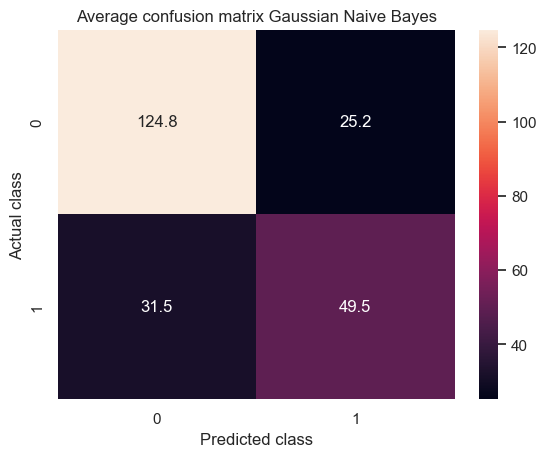

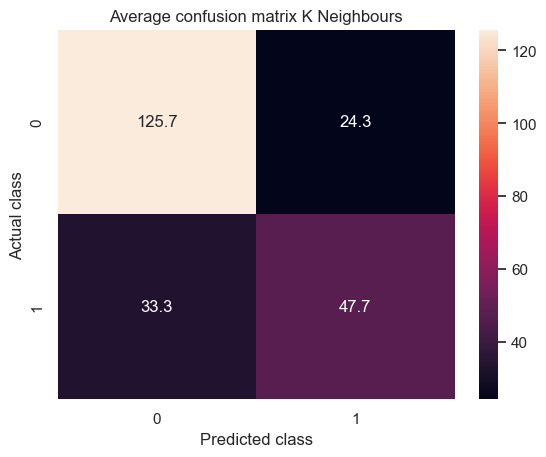

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Confusing matrices
def plotConfusionMatrix(cm, y, title):
    df_cm = pd.DataFrame(cm, index = [0, 1], columns = [0, 1])
    plt.figure()
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()

cm_gnb = sum([sk.metrics.confusion_matrix(y_test[i], y_pred_class_gnb[i]) 
              for i in range(nr_of_iterations)]) /nr_of_iterations
plotConfusionMatrix(cm_gnb, y_test, 'Average confusion matrix Gaussian Naive Bayes')

print()

cm_knn = sum([sk.metrics.confusion_matrix(y_test[i], y_pred_class_knn[i])
              for i in range(nr_of_iterations)]) /nr_of_iterations
plotConfusionMatrix(cm_knn, y_test, 'Average confusion matrix K Neighbours')

In [1]:
# Scaling data prior to performing PCA
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Performing dimensionality reduction
nPCs = 8
pca = PCA(n_components=nPCs)
X_pca = pca.fit_transform(X)

# How much variance does each PC explain?
print(pca.explained_variance_ratio_)

# How much does each feature affect a PC?
np.set_printoptions(precision=2, suppress=True)
print(abs(pca.components_))
np.set_printoptions()

# What is each component's most important feature's index?
mstFI = [np.abs(pca.components_[i]).argmax() for i in range(nPCs)]
print(mstFI)
# What are the names of the most important features?
mstFN = [attribute_names[i] for i in mstFI]
print(mstFN)

NameError: name 'StandardScaler' is not defined